In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from noventis.data_cleaner import NoventisScaler
from noventis.data_cleaner import NoventisEncoder
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_scaling_comparison(df_original, df_scaled, scenario_title):
    """Membuat plot perbandingan distribusi sebelum dan sesudah scaling."""
    cols = df_original.select_dtypes(include=np.number).columns
    n_cols = len(cols)
    
    fig, axes = plt.subplots(n_cols, 2, figsize=(10, n_cols * 3.5))
    fig.suptitle(f'Perbandingan Distribusi - Skenario: {scenario_title}', fontsize=16, y=1.02)
    
    for i, col in enumerate(cols):
        # Plot Sebelum Scaling
        sns.kdeplot(df_original[col], ax=axes[i, 0], fill=True, color='blue')
        axes[i, 0].set_title(f'{col} (Sebelum)')
        axes[i, 0].set_xlabel('')
        
        # Plot Sesudah Scaling
        sns.kdeplot(df_scaled[col], ax=axes[i, 1], fill=True, color='green')
        axes[i, 1].set_title(f'{col} (Sesudah)')
        axes[i, 1].set_xlabel('')
        
    plt.tight_layout()
    plt.show()

In [4]:
np.random.seed(42)
data = {
    'normal_data': np.random.normal(loc=100, scale=15, size=500),
    'skewed_data': np.random.gamma(shape=1, scale=50, size=500)**2,
    'data_with_outliers': np.concatenate([np.random.normal(loc=50, scale=10, size=490), 
                                          np.array([250, 260, -90, -100, 275, -80, 255, 240, -110, -95])]),
    'bimodal_data': np.concatenate([np.random.normal(loc=20, scale=5, size=250), 
                                    np.random.normal(loc=80, scale=7, size=250)])
}
df_original = pd.DataFrame(data)

print("=== DATA ASLI (5 baris pertama) ===")
print(df_original.head())
print("\n" * 2)


=== DATA ASLI (5 baris pertama) ===
   normal_data   skewed_data  data_with_outliers  bimodal_data
0   107.450712   2694.775860           48.328819     26.508706
1    97.926035   1788.366800           51.467137     27.807556
2   109.715328    484.454978           62.065090     20.160021
3   122.845448  46358.305071           41.830643     16.232911
4    96.487699   2166.125224           53.686733     22.299861





========================= USE CASE 1: AUTO MODE =========================

📋 SCALING SUMMARY
----------------------------------------
   - STANDARD: 2 columns
   - POWER: 2 columns

📊 DETAILED REPORT
----------------------------------------
  Column: normal_data
     - Method: STANDARD
     - Reason: p-value 0.401 > 0.05
     - Skewness: 0.18 | Outlier Ratio: 0.80%
  Column: skewed_data
     - Method: POWER
     - Reason: High skewness (4.49)
     - Skewness: 4.49 | Outlier Ratio: 11.40%
  Column: data_with_outliers
     - Method: POWER
     - Reason: High skewness (2.76)
     - Skewness: 2.76 | Outlier Ratio: 2.40%
  Column: bimodal_data
     - Method: STANDARD
     - Reason: Default fallback
     - Skewness: 0.03 | Outlier Ratio: 0.00%

Hasil setelah AUTO scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.499735     0.405491           -0.129868     -0.783305
1    -0.148023     0.205696           -0.010658     -0.740740
2     0.653748    -

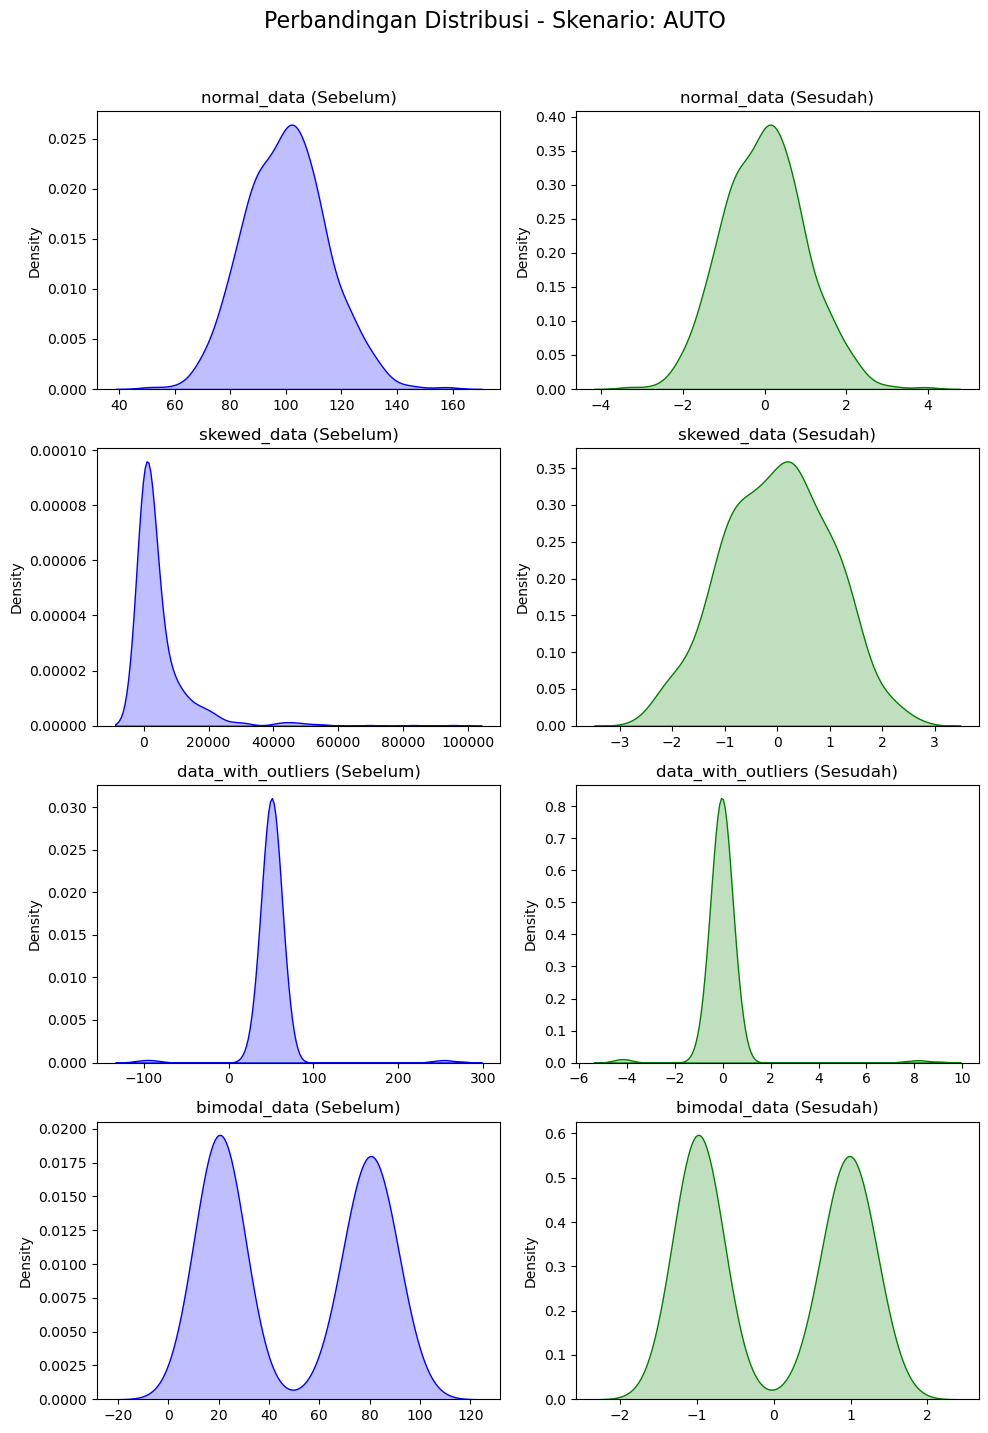

In [5]:

# --- USE CASE 1: AUTO MODE ---
print("="*25 + " USE CASE 1: AUTO MODE " + "="*25)
# Membuat instance scaler dalam mode auto
auto_scaler = NoventisScaler(method='auto', skew_threshold=2.0)
# Fit dan transform data
df_auto_scaled = auto_scaler.fit_transform(df_original.copy())
# Menampilkan hasil
print("\nHasil setelah AUTO scaling (5 baris pertama):")
print(df_auto_scaled.head())
# Membuat plot
plot_scaling_comparison(df_original, df_auto_scaled, "AUTO")





==================== USE CASE 2: FORCE STANDARD SCALER ====================

📋 SCALING SUMMARY
----------------------------------------
   - STANDARD: 4 columns

📊 DETAILED REPORT
----------------------------------------
  Column: normal_data
     - Method: STANDARD
     - Reason: Forced by user
     - Skewness: 0.18 | Outlier Ratio: 0.80%
  Column: skewed_data
     - Method: STANDARD
     - Reason: Forced by user
     - Skewness: 4.49 | Outlier Ratio: 11.40%
  Column: data_with_outliers
     - Method: STANDARD
     - Reason: Forced by user
     - Skewness: 2.76 | Outlier Ratio: 2.40%
  Column: bimodal_data
     - Method: STANDARD
     - Reason: Forced by user
     - Skewness: 0.03 | Outlier Ratio: 0.00%

Hasil setelah STANDARD scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.499735    -0.222833           -0.105532     -0.783305
1    -0.148023    -0.312354            0.010353     -0.740740
2     0.653748    -0.441135            0.40169

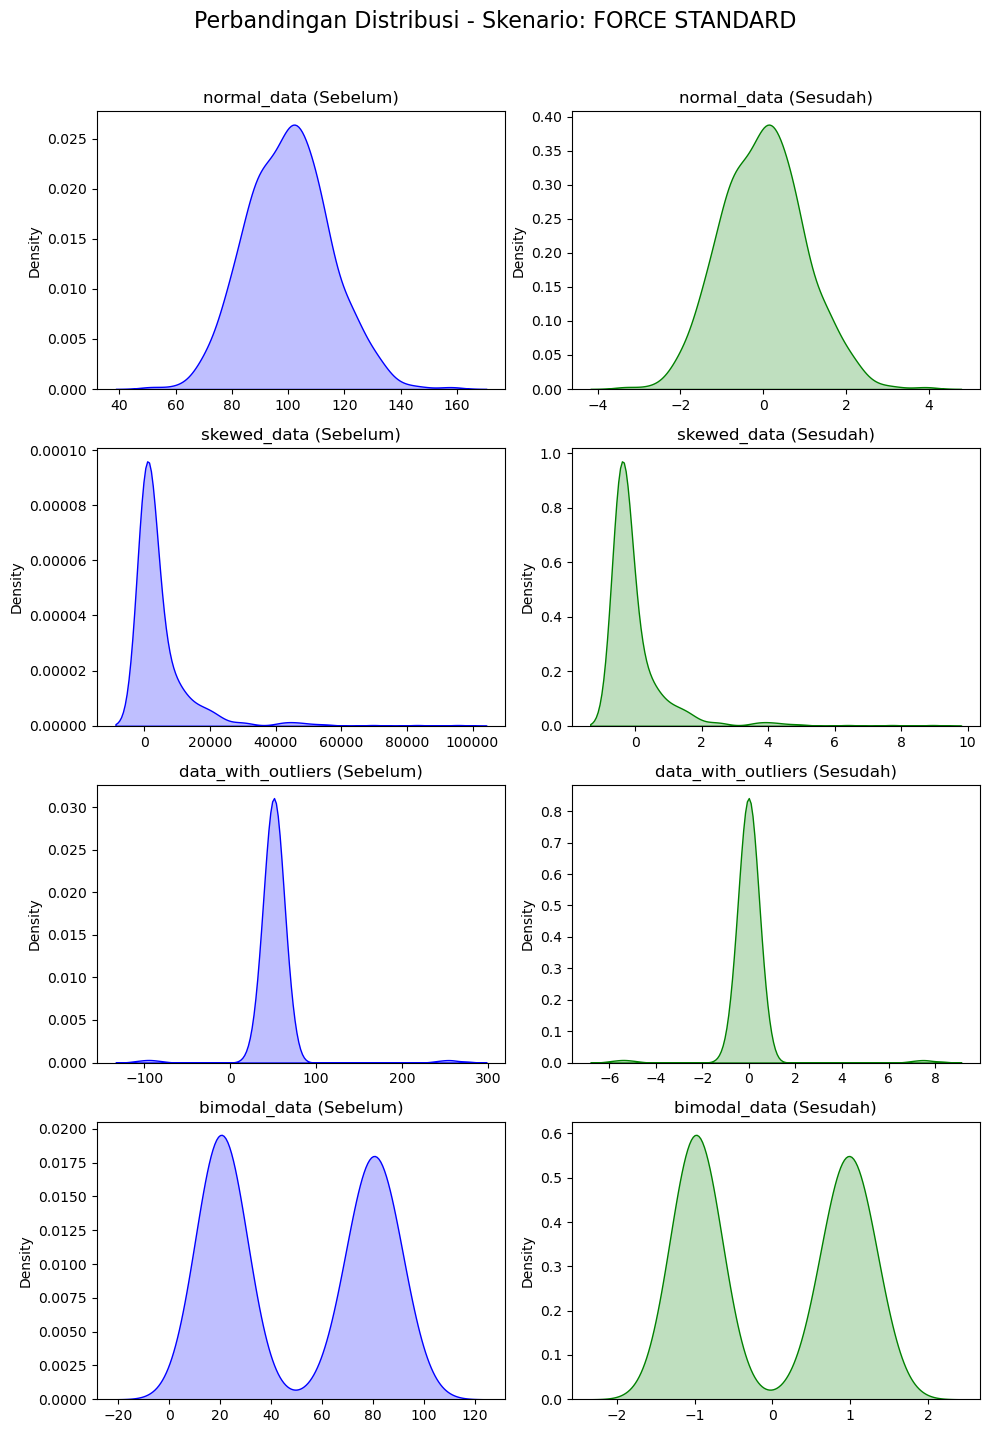

In [6]:


# --- USE CASE 2: FORCE STANDARD SCALER ---
print("\n" * 3 + "="*20 + " USE CASE 2: FORCE STANDARD SCALER " + "="*20)
standard_scaler = NoventisScaler(method='standard')
df_standard_scaled = standard_scaler.fit_transform(df_original.copy())
print("\nHasil setelah STANDARD scaling (5 baris pertama):")
print(df_standard_scaled.head())
plot_scaling_comparison(df_original, df_standard_scaled, "FORCE STANDARD")






==================== USE CASE 3: FORCE ROBUST SCALER ====================

📋 SCALING SUMMARY
----------------------------------------
   - ROBUST: 4 columns

📊 DETAILED REPORT
----------------------------------------
  Column: normal_data
     - Method: ROBUST
     - Reason: Forced by user
     - Skewness: 0.18 | Outlier Ratio: 0.80%
  Column: skewed_data
     - Method: ROBUST
     - Reason: Forced by user
     - Skewness: 4.49 | Outlier Ratio: 11.40%
  Column: data_with_outliers
     - Method: ROBUST
     - Reason: Forced by user
     - Skewness: 2.76 | Outlier Ratio: 2.40%
  Column: bimodal_data
     - Method: ROBUST
     - Reason: Forced by user
     - Skewness: 0.03 | Outlier Ratio: 0.00%

Hasil setelah ROBUST scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.361918     0.111078           -0.172000     -0.367644
1    -0.112978     0.042280            0.063541     -0.345952
2     0.474830    -0.056689            0.858951     -0.47367

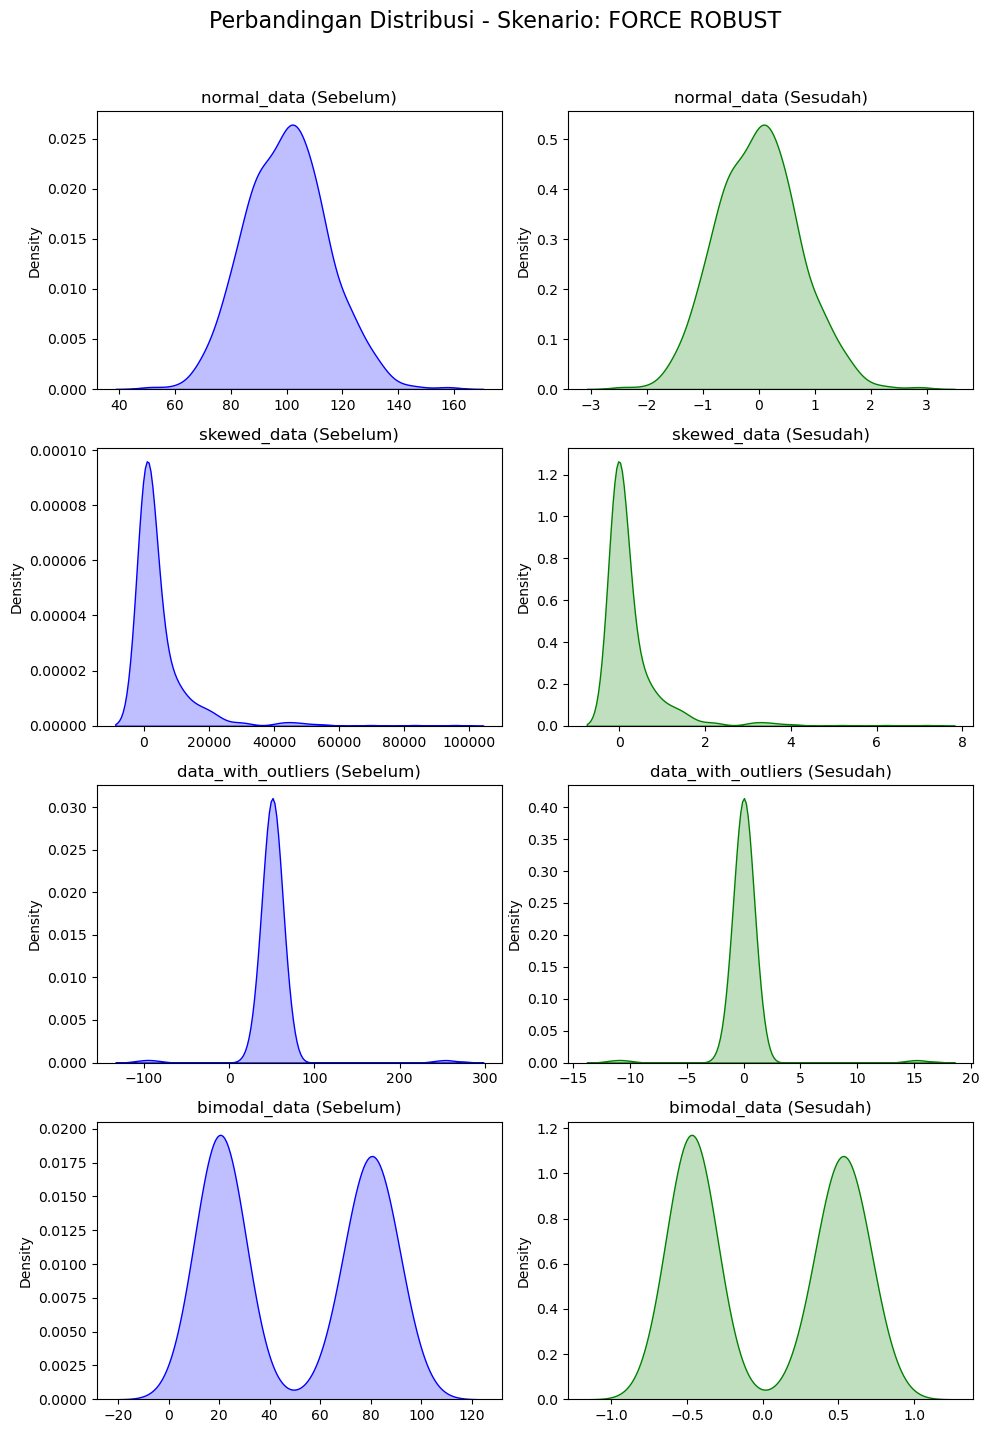

In [7]:

# --- USE CASE 3: FORCE ROBUST SCALER ---
print("\n" * 3 + "="*20 + " USE CASE 3: FORCE ROBUST SCALER " + "="*20)
robust_scaler = NoventisScaler(method='robust')
df_robust_scaled = robust_scaler.fit_transform(df_original.copy())
print("\nHasil setelah ROBUST scaling (5 baris pertama):")
print(df_robust_scaled.head())
plot_scaling_comparison(df_original, df_robust_scaled, "FORCE ROBUST")







=================== USE CASE 4: FORCE POWER TRANSFORMER =================

📋 SCALING SUMMARY
----------------------------------------
   - POWER: 4 columns

📊 DETAILED REPORT
----------------------------------------
  Column: normal_data
     - Method: POWER
     - Reason: Forced by user
     - Skewness: 0.18 | Outlier Ratio: 0.80%
  Column: skewed_data
     - Method: POWER
     - Reason: Forced by user
     - Skewness: 4.49 | Outlier Ratio: 11.40%
  Column: data_with_outliers
     - Method: POWER
     - Reason: Forced by user
     - Skewness: 2.76 | Outlier Ratio: 2.40%
  Column: bimodal_data
     - Method: POWER
     - Reason: Forced by user
     - Skewness: 0.03 | Outlier Ratio: 0.00%

Hasil setelah POWER scaling (5 baris pertama):
   normal_data  skewed_data  data_with_outliers  bimodal_data
0     0.518668     0.405491           -0.129868     -0.634886
1    -0.122357     0.205696           -0.010658     -0.575292
2     0.668089    -0.369218            0.394961     -0.960944
3   

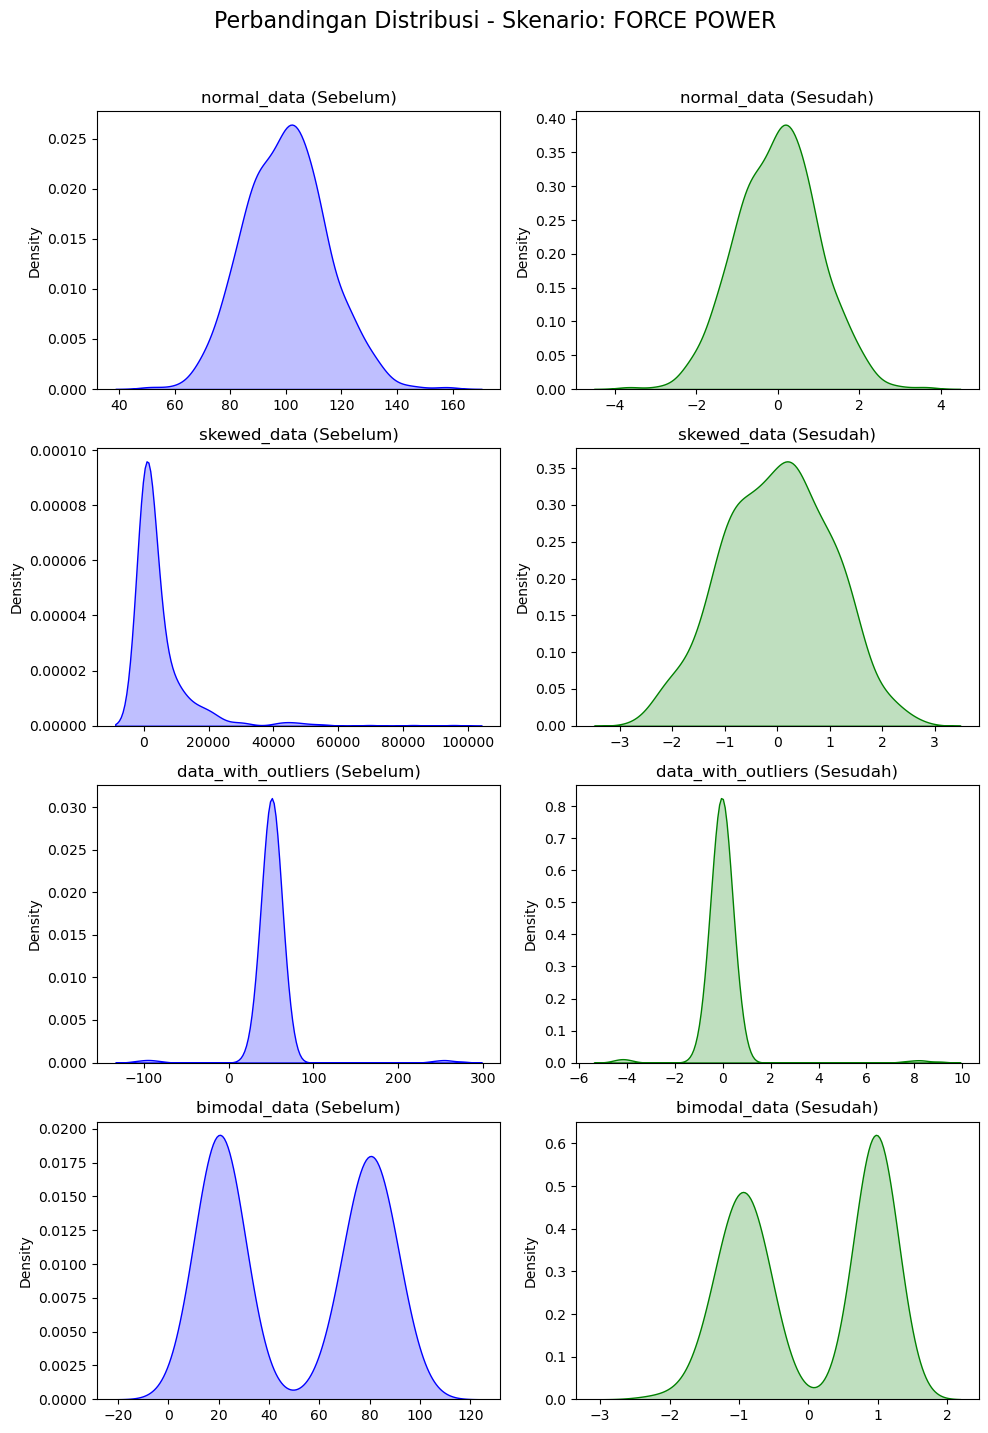

In [8]:
# --- USE CASE 4: FORCE POWER TRANSFORMER ---
print("\n" * 3 + "="*19 + " USE CASE 4: FORCE POWER TRANSFORMER " + "="*17)
power_scaler = NoventisScaler(method='power')
df_power_scaled = power_scaler.fit_transform(df_original.copy())
print("\nHasil setelah POWER scaling (5 baris pertama):")
print(df_power_scaled.head())
plot_scaling_comparison(df_original, df_power_scaled, "FORCE POWER")

In [9]:
df = sb.load_dataset('titanic')

NameError: name 'sb' is not defined

In [ ]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
scaler = NoventisScaler()
scaler.fit(df[['fare']])

+ Column: 'fare'. Method: 'power'. Reason: high skewness (4.78) requires normalization
NoventisScaler: Fitting complete for 1 numerical features.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
encoder = NoventisEncoder()
encoded_df = encoder.fit(df, y='alone')

ValueError: target_column is required for method 'auto'

In [ ]:
encoded_df